<a href="https://colab.research.google.com/github/maker57sk/ml_projects/blob/master/simpleGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [ ]:
def calculate(x):
  return x * x

In [ ]:
inputs = [-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5]

In [ ]:
outputs = [calculate(x) for x in inputs]

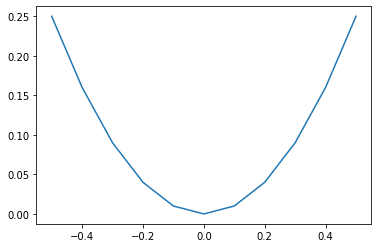

In [ ]:
plt.plot(inputs,outputs)
plt.show()

In [ ]:
def genarate_samples(n=100):
  X1 = np.random.rand(n) - 0.5
  X2 = X1 * X1
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  return np.hstack((X1, X2))

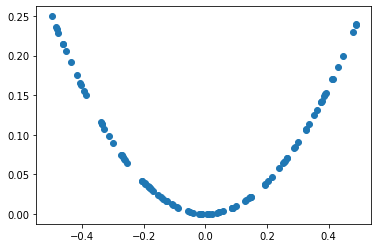

In [ ]:
data = genarate_samples()
plt.scatter(data[:,0], data[:, 1])
plt.show()

In [ ]:
def define_discriminator(n_inputs=2):
  model = Sequential()
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binery_crossentropy', optimizer='adam', metrics=['accuracy'] )
  return model

In [ ]:
model = define_discriminator()
summary = model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_layer(index=0)

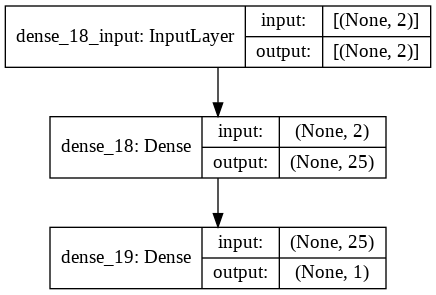

In [ ]:
plot_model(model, to_file='disc_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
def generate_real_samples(n):
  X1 = np.random.rand(n) - 0.5
  X2 = X1 * X1
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = np.hstack((X1, X2))
  y = ones(n, 1)
  return X,y


In [ ]:
def generate_real_samples(n):
  X1 = -1 + np.random.rand(n) * 2
  X2 = -1 + np.random.rand(n) * 2
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = np.hstack((X1, X2))
  y = zeros(n, 1)
  return X,y

In [ ]:
def train_discrimanator_model():
  